Will be using this notebook for questions and research concerning cosmology. Maybe gravitational waves and the data we have now can allow us to ask some interesting questions...

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
O1_all = pd.read_csv("../Data/GWTC-1-confident.csv")
O2_all = pd.read_csv("../Data/GWTC-2.csv")
O3_all = pd.read_csv("../Data/GWTC-3-confident.csv")
O4_all = pd.read_csv("../Data/real_events_O4_ALL.csv")

# Redefining some columns so I can build loops
O4_all["network_matched_filter_snr"] = O4_all["snr"]
O4_all["mass_1_source"] = O4_all["mass1"]
O4_all["mass_2_source"] = O4_all["mass2"]
O4_all["far"] = O4_all["combined_far"]

In [13]:
# Defining the Pearson and Spearman (used for data with significant outliers) correlation coefficent

# Make sure to supply PCC with X and Y having quotations around them (so they may be accessed inside of PCC)
def PCC(dataset, X, Y):
    
    X_mean = np.sum(dataset[X])/len(dataset[X])
    Y_mean = np.sum(dataset[Y])/len(dataset[Y])

    X_std = np.sqrt(np.sum((dataset[X] - X_mean)**2) / len(dataset))
    Y_std = np.sqrt(np.sum((dataset[Y] - Y_mean)**2) / len(dataset))


    cov = np.sum((dataset[X] - X_mean) * (dataset[Y] - Y_mean)) / len(dataset)

    pcc = cov/(X_std * Y_std)
    
    return pcc

# Similarily for the Spearman correlation coefficient: 

def SCC(dataset, X, Y):
    
    dataset['Rank_X'] = dataset[X].rank()
    dataset['Rank_Y'] = dataset[Y].rank()
    
    X_rank_mean = np.sum(dataset["Rank_X"])/len(dataset["Rank_X"])
    Y_rank_mean = np.sum(dataset["Rank_Y"])/len(dataset["Rank_Y"])

    X_rank_std = np.sqrt(np.sum((dataset["Rank_X"] - X_rank_mean)**2) / len(dataset))
    Y_rank_std = np.sqrt(np.sum((dataset["Rank_Y"] - Y_rank_mean)**2) / len(dataset))


    cov_rank = np.sum((dataset["Rank_X"] - X_rank_mean) * (dataset["Rank_Y"] - Y_rank_mean)) / len(dataset)

    scc = cov_rank/(X_rank_std * Y_rank_std)

    return scc

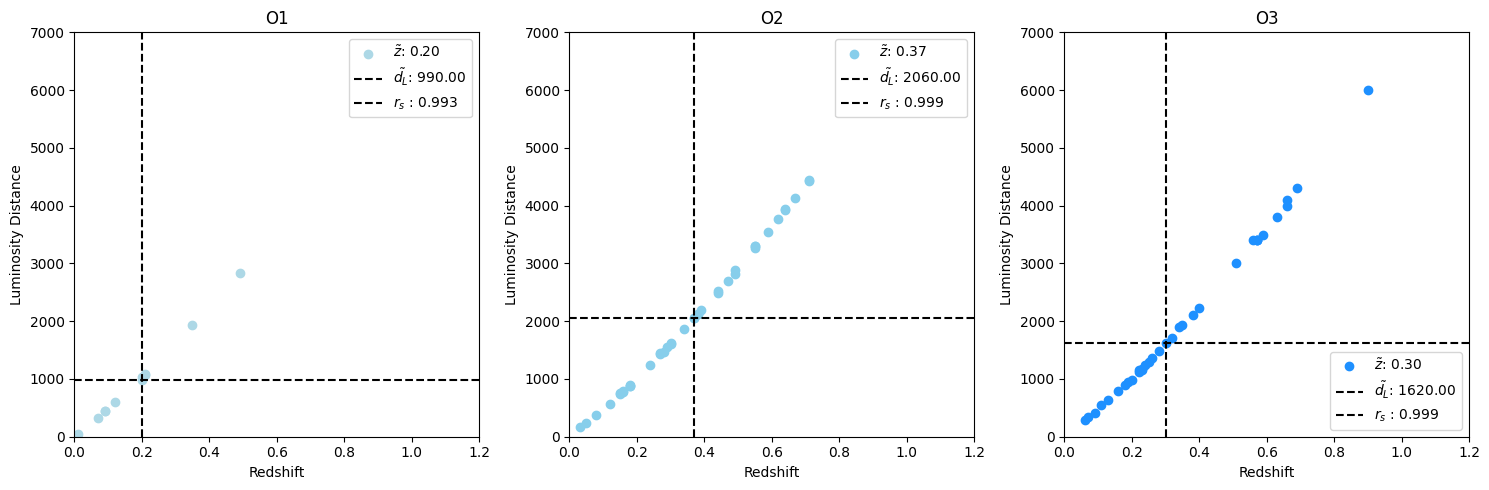

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

datasets = [O1_all, O2_all, O3_all]

dataset_labels = ["O1", "O2", "O3"]

colors = ["lightblue", "skyblue", "dodgerblue"]

right_index = [0,1,2]
for dataset, dataset_label, color, ri in zip(datasets, dataset_labels, colors, right_index):

    ax[ri].scatter(dataset["redshift"], dataset["luminosity_distance"], color=color, label=dataset_label)

    median_chi_eff = np.median(dataset["redshift"])
    median_luminosity_distance = np.median(dataset["luminosity_distance"])

    ax[ri].axvline(median_chi_eff, color="black", linestyle="--")
    ax[ri].axhline(median_luminosity_distance, color="black", linestyle="--")

    scc = SCC(dataset, "redshift", "luminosity_distance")

    ax[ri].legend([f'$\\tilde{{z}}$: {median_chi_eff:.2f}', f'$\\tilde{{d_L}}$: {median_luminosity_distance:.2f}', f'$r_s$ : {scc:.3f}'])

    # remember that these limits are manually set
    ax[ri].set_xlim(0, 1.2)
    ax[ri].set_ylim(0, 7000)
    
    ax[ri].set_xlabel("Redshift")
    ax[ri].set_ylabel("Luminosity Distance")

    ax[ri].set_title(dataset_label)

plt.tight_layout()

plt.show()

Using the relationship:

$$H_0 = c\left(\frac{z}{D} \right)$$

where c is in km/sec

In [36]:
H_tot = 0
for index, row in O1_all.iterrows():
    # 3e5 is the speed of light converted to km/s... because H is in km/s/Mpc
    H = 3e5* row["redshift"]/row["luminosity_distance"]
    print("{:.1f}".format(H))
    H_tot += H
print("{:.1f}".format(H_tot/len(O1_all)), "This is the average Hubble constant assumed with O1 data")

54.1
59.4
75.0
60.0
58.3
51.8
65.6
60.6
60.0
58.3
61.4
60.4 This is the average Hubble constant assumed with O1 data


In [45]:
H_tot = 0
for index, row in O2_all.iterrows():
    # 3e5 is the speed of light converted to km/s... because H is in km/s/Mpc
    H = 3e5* row["redshift"]/row["luminosity_distance"]
    H_tot += H
print("{:.1f}".format(H_tot/len(O2_all)), "This is the average Hubble constant assumed by O2 data")

55.0 This is the average Hubble constant assumed by O2 data


In [46]:
H_tot = 0
for index, row in O3_all.iterrows():
    # 3e5 is the speed of light converted to km/s... because H is in km/s/Mpc
    H = 3e5* row["redshift"]/row["luminosity_distance"]
    H_tot += H
print("{:.1f}".format(H_tot/len(O3_all)), "This is the average Hubble constant assumed by O3 data")

55.2 This is the average Hubble constant assumed by O3 data


O1 Hubble Constant : 60.408972224739564
O2 Hubble Constant : 55.02339751988879
O3 Hubble Constant : 55.21107359916772


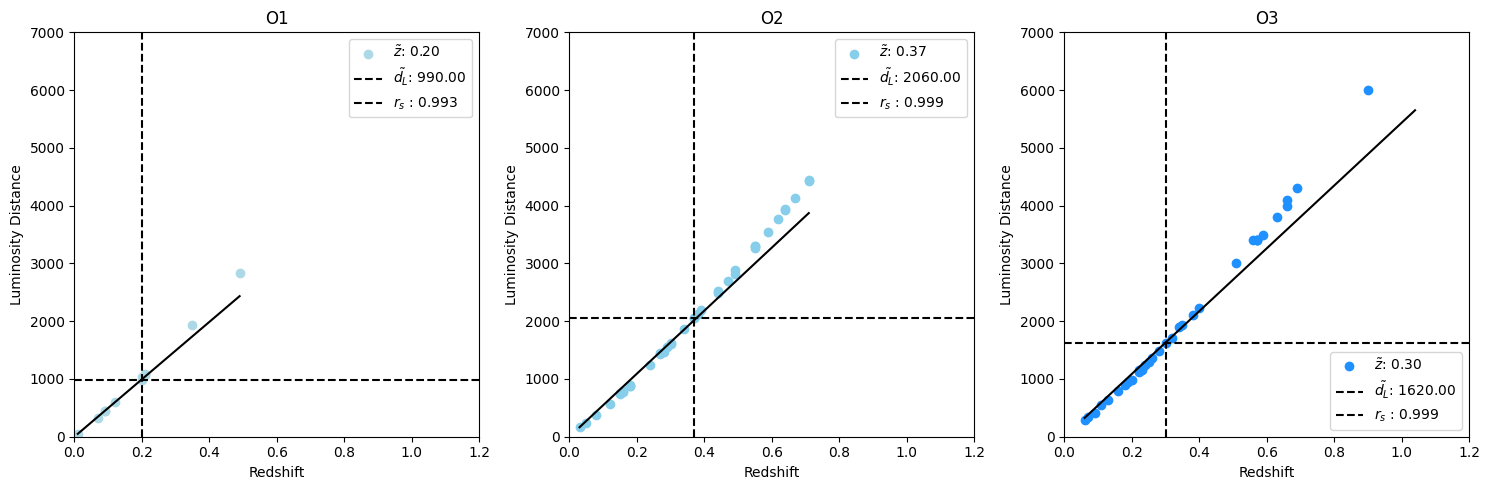

In [58]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

datasets = [O1_all, O2_all, O3_all]

dataset_labels = ["O1", "O2", "O3"]

colors = ["lightblue", "skyblue", "dodgerblue"]

right_index = [0,1,2]
for dataset, dataset_label, color, ri in zip(datasets, dataset_labels, colors, right_index):

    ax[ri].scatter(dataset["redshift"], dataset["luminosity_distance"], color=color, label=dataset_label)

    median_chi_eff = np.median(dataset["redshift"])
    median_luminosity_distance = np.median(dataset["luminosity_distance"])

    ax[ri].axvline(median_chi_eff, color="black", linestyle="--")
    ax[ri].axhline(median_luminosity_distance, color="black", linestyle="--")

    scc = SCC(dataset, "redshift", "luminosity_distance")
    
    H_tot = 0
    for index, row in dataset.iterrows():
        # 3e5 is the speed of light converted to km/s... because H is in km/s/Mpc
        H = 3e5* row["redshift"]/row["luminosity_distance"]
        H_tot += H
    H_0 = H_tot/len(dataset)
    
    x = np.linspace(min(dataset["redshift"]), max(dataset["redshift"]), 100)
    
    ax[ri].plot(x, 3e5/H_0*x, color = "black")
    
    ax[ri].legend([f'$\\tilde{{z}}$: {median_chi_eff:.2f}', f'$\\tilde{{d_L}}$: {median_luminosity_distance:.2f}', f'$r_s$ : {scc:.3f}'])
    
    # remember that these limits are manually set
    ax[ri].set_xlim(0, 1.2)
    ax[ri].set_ylim(0, 7000)
    
    ax[ri].set_xlabel("Redshift")
    ax[ri].set_ylabel("Luminosity Distance")

    ax[ri].set_title(dataset_label)

    print(dataset_label, "Hubble Constant :" ,H_0)
    
plt.tight_layout()

plt.show()